<a href="https://colab.research.google.com/github/yuri98s/Projeto_EBAC_ML/blob/main/Projeto_Parceria_EBAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJETO PARCERIA EBAC**

Este notebook foi desenvolvido para fazer análises descritivas utilizando um modelo estatístico e técnicas de modelagem aprendidas ao longo do curso.

**ANÁLISE DE CREDITO**

O material utilizado é composto por dados de cartões de credito e de seus proprietários.

Em nossas análises, iremos criar um modelo para fazer a predição do limite de crédito dos clientes com base em dados como idade, dependentes, escolaridade, renda anual, etc.

Base de dados disponibilizada através deste [LINK](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/credito.csv)

* **Extração**

In [26]:
#pacotes pandas
import numpy as np

# pacotes ETL
import pandas as pd

# pacotes ML
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

# pacotes gráficos
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

Faremos a extração por um código Bash para download do arquivo para facilitar a extração.

In [2]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/credito.csv' -O credito.csv

In [3]:
dados = pd.read_csv('credito.csv').drop(columns={'id', 'default'})

In [4]:
dados.head()

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


* **Tratamento**

Aplicando métricas em colunas com atributos numéricos.

In [5]:
# limite crédito
dados['limite_credito'] = dados['limite_credito'].apply(lambda i: str(i).replace(',','')).astype(float)

In [6]:
credito = []
for i in dados['limite_credito']:
  if i < 2.00000:
    creditos = 'até 2.00000'

  elif i < 4.00000:
    creditos = 'até 4.00000'

  elif i < 6.00000:
    creditos = 'até 6.00000'

  elif i < 8.00000:
    creditos = 'até 8.00000'

  elif i < 10.00000:
    creditos = 'até 10.00000'

  elif i > 10.00000:
    creditos = '10.00000 +'
  credito.append(creditos)

Criando e fundindo o data frame label.

In [7]:
dados['credito_mapeado'] = pd.DataFrame(credito)

Agora faremos alguns ajustes nas variáveis categóricas para trabalharmos com a biblioteca Scikit Learn com mais facilidade.

In [8]:
# sexo
dados['sexo_nom'] = np.where(dados['sexo'] == 'M', 1, 0)

In [9]:
# escolaridade
escolaridade_mapper = {
  'ensino medio':3,
  "mestrado":5,
  "sem educacao formal":2,
  "na":1,
  "graduacao":4,
  "doutorado":6
}

dados['escolaridade_ord'] = dados['escolaridade'].apply(lambda i: escolaridade_mapper[i])

In [10]:
# crédito
credito_mapper ={
    'até 2.00000':1,
    'até 4.00000':2,
    'até 6.00000':3,
    'até 8.00000':4,
    'até 10.00000':5,
    '10.00000 +':6
}
dados['credito_ord'] = dados['credito_mapeado'].apply(lambda i: credito_mapper[i])

In [11]:
# salário anual
salario_mapper = {
  "$60K - $80K":4,
  "menos que $40K":2,
  "$80K - $120K":5,
  "$40K - $60K":3,
  "$120K +":6,
  "na":1
}
dados['salario_ord'] = dados['salario_anual'].apply(lambda i: salario_mapper[i])

In [12]:
dados.head()

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m,credito_mapeado,sexo_nom,escolaridade_ord,credito_ord,salario_ord
0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12.69151,"1.144,90",42,10.00000 +,1,3,6,4
1,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8.25696,"1.291,45",33,até 10.00000,0,5,5,2
2,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3.41856,"1.887,72",20,até 4.00000,1,5,2,5
3,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,3.31303,"1.171,56",20,até 4.00000,0,3,2,2
4,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4.71622,"816,08",28,até 6.00000,1,2,3,4


* **Análise**

In [13]:
dados_ml = dados[['idade', 'sexo_nom', 'dependentes', 'escolaridade_ord', 'salario_ord','credito_ord','credito_mapeado']].copy()

In [14]:
dados_ml.head()

,idade,sexo_nom,dependentes,escolaridade_ord,salario_ord,credito_ord,credito_mapeado
0,45,1,3,3,4,6,10.00000 +
1,49,0,5,5,2,5,até 10.00000
2,51,1,3,5,5,2,até 4.00000
3,40,0,4,3,2,2,até 4.00000
4,40,1,3,2,4,3,até 6.00000


In [15]:
features = dados[['idade', 'sexo_nom', 'dependentes', 'escolaridade_ord','salario_ord','credito_ord']]
labels = dados['credito_mapeado']

Dividir base de dados em treino e teste

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.3, random_state=0
)

Criando modelos

In [17]:
# DecisionTreeClassifier() & StandardScaler()

pipe = Pipeline([('scaler', StandardScaler()),
                 ('imputer', SimpleImputer(strategy='median')),
                 ('modelo_class', DecisionTreeClassifier())])

In [18]:
arvore = RandomForestClassifier()
arvore.fit(X_train, y_train)
previsao_arvore = arvore.predict(X_test)

* **Avaliação**

Testando a Acuracidade

In [42]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

1.0

In [20]:
print(accuracy_score(y_test, previsao_arvore))

0.9993418887792037




Ambos os modelos apresentaram ótimo desempenho, então vamos comparar nossa predição com os dados de testes



In [41]:
# predição
predicao = arvore.predict(X_test)
predicao[0:5]

array(['10.00000 +', '10.00000 +', 'até 4.00000', 'até 4.00000',
       'até 4.00000'], dtype=object)

In [23]:
# dados de teste
y_test[0:5]

3358     10.00000 +
9951     10.00000 +
3848    até 4.00000
1666    até 4.00000
8383    até 4.00000
Name: credito_mapeado, dtype: object

* **Visualização**

Matriz de Confusão

In [28]:
confusion_matrix = confusion_matrix(predicao, y_test)
print(confusion_matrix)

[[ 817    0    0    0    0    0]
 [   0  208    0    0    0    0]
 [   0    0  428    0    0    0]
 [   0    0    0 1001    0    0]
 [   0    0    0    0  353    0]
 [   0    2    0    0    0  230]]


Martiz de Confusão com mapa de calor

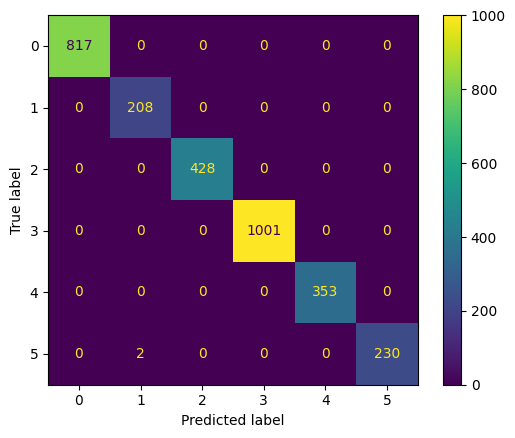

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
disp.plot()
plt.show()